In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten,Dropout
from keras import Sequential

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
28*28

784

In [ ]:
#each pixel contains a value from 0-255

In [5]:
import matplotlib.pyplot as plt


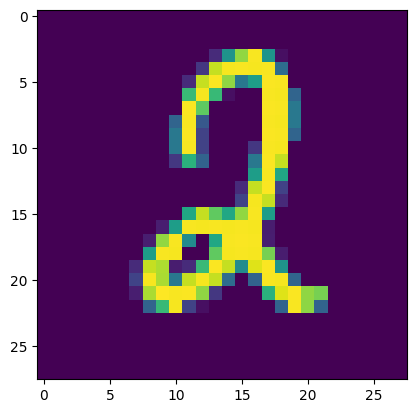

In [6]:
plt.imshow(x_train[55100])
plt.show()

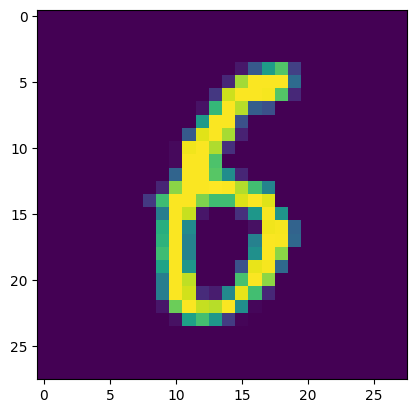

In [7]:
plt.imshow(x_train[4560])
plt.show()

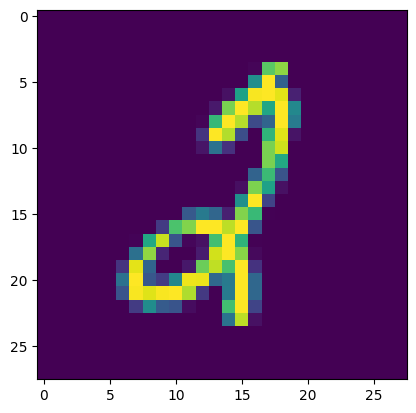

In [8]:
plt.imshow(x_train[6743])
plt.show()

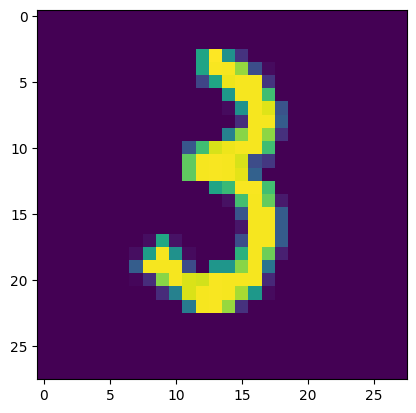

In [9]:
plt.imshow(x_train[1234])
plt.show()

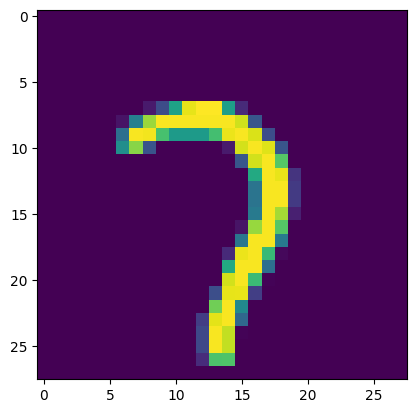

In [10]:
plt.imshow(x_train[6740])
plt.show()

In [11]:
y_train[6740]

7

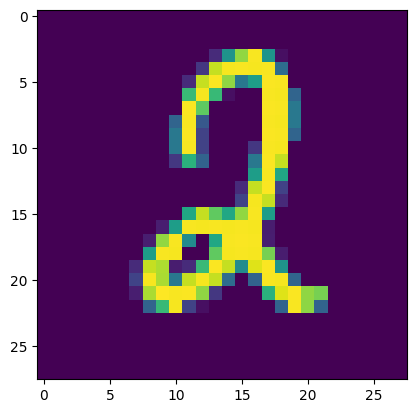

In [12]:
plt.imshow(x_train[55100])
plt.show()

In [13]:
print(x_train[55100])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  31 132 214 253 132
   10   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  41 233 252 253 252 253
   91   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  31 233 254 213 102 142 254
  253   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 173 252 172  10   0   0 253
  252  82   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 254 192   0   0   0   0 254
  253 102   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  82 253  70   0   0   

In [14]:
#Feature scaling
x_train_scaled=x_train/255.0
x_test_scaled=x_test/255.0

In [15]:
print(x_train_scaled[55100])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.1215

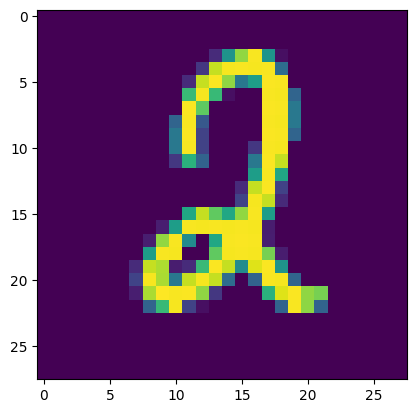

In [16]:
plt.imshow(x_train_scaled[55100])
plt.show()

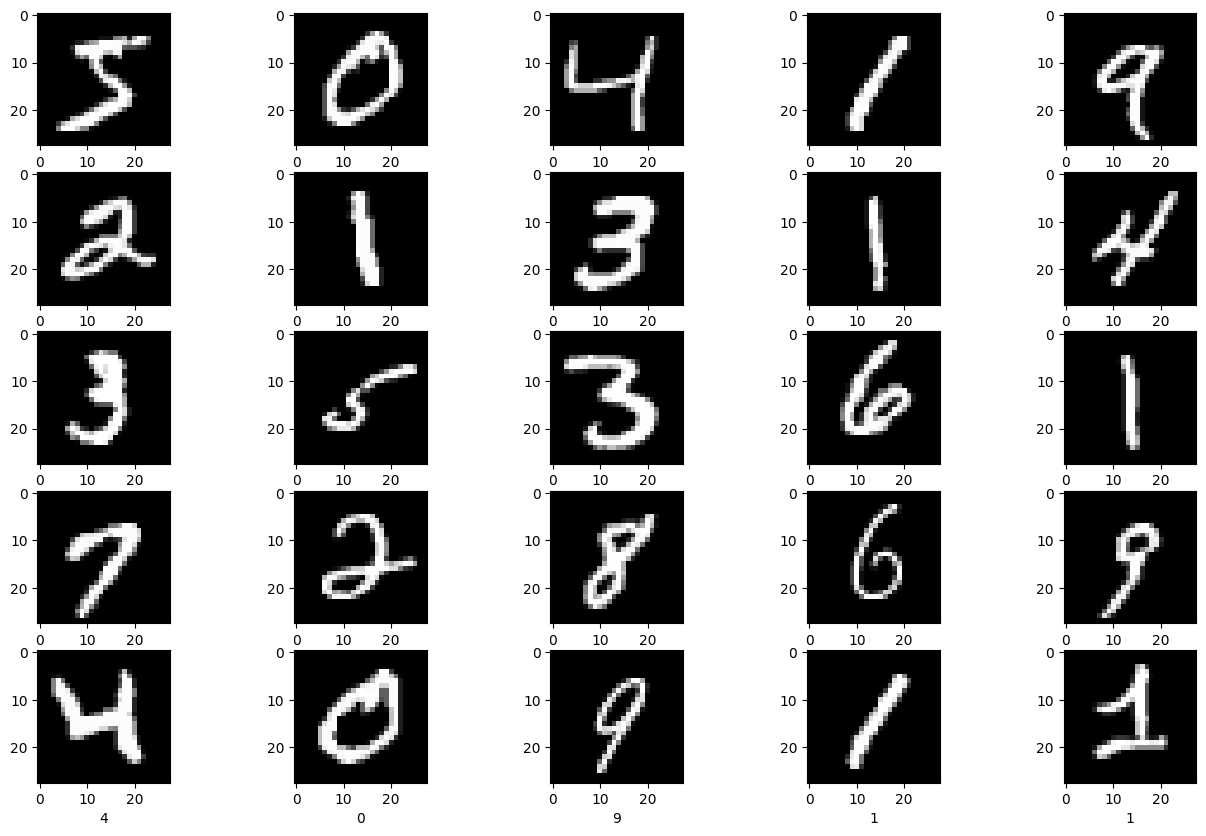

In [17]:
plt.figure(figsize=(16,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train_scaled[i],cmap='gray')
    plt.xlabel(y_train[i])
plt.show()

In [18]:
import pandas as pd
pd.DataFrame(y_train).value_counts()

,count
0,
1,6742
7,6265
3,6131
2,5958
9,5949
0,5923
6,5918
8,5851
4,5842


In [19]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))#convert 2d-1d
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))#o/p layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
history=model.fit(x_train_scaled,y_train,epochs=10,validation_data=(x_test_scaled,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8534 - loss: 0.5004 - val_accuracy: 0.9586 - val_loss: 0.1424
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9532 - loss: 0.1564 - val_accuracy: 0.9702 - val_loss: 0.0998
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9646 - loss: 0.1195 - val_accuracy: 0.9725 - val_loss: 0.0936
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9696 - loss: 0.0939 - val_accuracy: 0.9755 - val_loss: 0.0823
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9721 - loss: 0.0863 - val_accuracy: 0.9783 - val_loss: 0.0718
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9765 - loss: 0.0746 - val_accuracy: 0.9803 - val_loss: 0.0708
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9792 - loss: 0.0670 - val_accuracy: 0.9794 - val_loss: 0.0685
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9816 - loss: 0.0574

In [ ]:
60000/32

1875.0

In [ ]:
1875*32

60000

In [ ]:
#1875FP+1875BP+1875 Weight updations

In [23]:
model_1=Sequential()
model_1.add(Flatten(input_shape=(28,28)))#convert 2d-1d
model_1.add(Dense(128,activation='relu'))
model_1.add(Dropout(0.25))
model_1.add(Dense(10,activation='softmax'))#o/p layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
history_1=model_1.fit(x_train_scaled,y_train,epochs=10,batch_size=16,validation_data=(x_test_scaled,y_test))

Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8692 - loss: 0.4410 - val_accuracy: 0.9621 - val_loss: 0.1220
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9554 - loss: 0.1497 - val_accuracy: 0.9700 - val_loss: 0.0957
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9663 - loss: 0.1113 - val_accuracy: 0.9735 - val_loss: 0.0866
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9682 - loss: 0.0987 - val_accuracy: 0.9743 - val_loss: 0.0822
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9728 - loss: 0.0826 - val_accuracy: 0.9761 - val_loss: 0.0833
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9759 - loss: 0.0729 - val_accuracy: 0.9799 - val_loss: 0.0682
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9793 - loss: 0.0648 - val_accuracy: 0.9770 - val_loss: 0.0795
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9793 - loss: 0

In [26]:
model_2=Sequential()
model_2.add(Flatten(input_shape=(28,28)))#convert 2d-1d
model_2.add(Dense(128,activation='relu'))
model_2.add(Dropout(0.25))
model_2.add(Dense(10,activation='softmax'))#o/p layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
history_2=model_2.fit(x_train_scaled,y_train,epochs=10,batch_size=64,validation_data=(x_test_scaled,y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8254 - loss: 0.5888 - val_accuracy: 0.9521 - val_loss: 0.1699
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9458 - loss: 0.1872 - val_accuracy: 0.9619 - val_loss: 0.1229
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9602 - loss: 0.1336 - val_accuracy: 0.9686 - val_loss: 0.0995
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9679 - loss: 0.1093 - val_accuracy: 0.9735 - val_loss: 0.0851
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9726 - loss: 0.0877 - val_accuracy: 0.9746 - val_loss: 0.0840
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9755 - loss: 0.0790 - val_accuracy: 0.9758 - val_loss: 0.0774
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9768 - loss: 0.0717 - val_accuracy: 0.9791 - val_loss: 0.0699
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9797 - loss: 0.0642 - val_accuracy: 0.

In [29]:
model_3=Sequential()
model_3.add(Flatten(input_shape=(28,28)))#convert 2d-1d
model_3.add(Dense(128,activation='relu'))
model_3.add(Dropout(0.25))
model_3.add(Dense(10,activation='softmax'))#o/p layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model_3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
history_3=model_3.fit(x_train_scaled,y_train,epochs=10,batch_size=60000,validation_data=(x_test_scaled,y_test))

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1428 - loss: 2.4147 - val_accuracy: 0.2669 - val_loss: 2.1947
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2123 - loss: 2.2339 - val_accuracy: 0.3604 - val_loss: 2.0434
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2887 - loss: 2.0875 - val_accuracy: 0.4623 - val_loss: 1.9097
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3785 - loss: 1.9533 - val_accuracy: 0.5581 - val_loss: 1.7862
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4633 - loss: 1.8356 - val_accuracy: 0.6262 - val_loss: 1.6697
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5307 - loss: 1.7227 - val_accuracy: 0.6758 - val_loss: 1.5584
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5862 - loss: 1.6163 - val_accuracy: 0.7079 - val_loss: 1.4525
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6235 - loss: 1.5154 - val_accuracy: 0.7351 - val_loss: 1.3529
Epoch 9/10
1/1 ━

In [32]:
model_4=Sequential()
model_4.add(Flatten(input_shape=(28,28)))#convert 2d-1d
model_4.add(Dense(128,activation='relu'))
model_4.add(Dropout(0.25))
model_4.add(Dense(10,activation='softmax'))#o/p layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model_4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
history_4=model_4.fit(x_train_scaled,y_train,epochs=3,batch_size=1,validation_data=(x_test_scaled,y_test))

Epoch 1/3
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 235s 4ms/step - accuracy: 0.8828 - loss: 0.3866 - val_accuracy: 0.9601 - val_loss: 0.1431
Epoch 2/3
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 266s 4ms/step - accuracy: 0.9469 - loss: 0.1977 - val_accuracy: 0.9645 - val_loss: 0.1432
Epoch 3/3
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 265s 4ms/step - accuracy: 0.9552 - loss: 0.1836 - val_accuracy: 0.9681 - val_loss: 0.1477


In [35]:
from keras.callbacks import EarlyStopping

In [36]:
callback=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=10,verbose=1)

In [37]:
model_5=Sequential()
model_5.add(Flatten(input_shape=(28,28)))#convert 2d-1d
model_5.add(Dense(128,activation='relu'))
model_5.add(Dropout(0.25))
model_5.add(Dense(10,activation='softmax'))#o/p layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model_5.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [39]:
history_5=model_5.fit(x_train_scaled,y_train,epochs=5000,batch_size=32,validation_data=(x_test_scaled,y_test),callbacks=callback)

Epoch 1/5000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8546 - loss: 0.4975 - val_accuracy: 0.9585 - val_loss: 0.1392
Epoch 2/5000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9513 - loss: 0.1624 - val_accuracy: 0.9695 - val_loss: 0.1017
Epoch 3/5000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9639 - loss: 0.1211 - val_accuracy: 0.9747 - val_loss: 0.0881
Epoch 4/5000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9706 - loss: 0.0994 - val_accuracy: 0.9769 - val_loss: 0.0836
Epoch 5/5000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9733 - loss: 0.0843 - val_accuracy: 0.9780 - val_loss: 0.0758
Epoch 6/5000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9759 - loss: 0.0772 - val_accuracy: 0.9791 - val_loss: 0.0724
Epoch 7/5000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9783 - loss: 0.0677 - val_accuracy: 0.9785 - val_loss: 0.0749
Epoch 8/5000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9